# Q-learning in the worker search model

In this problem, we implement the Q-learning algorithm in the context of the McCall (1970) model. The problem is based on the corresponding <a href="https://python.quantecon.org/mccall_q.html">QuantEcon lecture</a>.


## Worker search model

The worker lives in an infinite-horizon economy, with discrete time \thinspace $t=0,1,2,\ldots $. Every period $t$, an iid wage offer $w$ from distribution $F\left(w\right) $ is drawn, with $F\left( 0\right) =0$, $F\left( B\right) =1$ for some $B>0$.

The worker decides to {accept or reject} the offer, $a_{t}\in \left\{ \text{accept, reject}\right\} $. Acceptance means that the worker receives income $y_{t}=w$ forever. Rejection implies that  the worker receives unemployment benefit $y_{t}=c$ and moves to next period where a new offer is drawn. Time is discounted at rate $\beta \in \lbrack 0,1)$.

The worker solves the sequence problem

\begin{equation}
V_{0}^{\ast }=\max_{\left\{ a_{t}\right\} _{t=0}^{\infty }}E_{0}\left[
\sum_{t=0}^{\infty }\beta ^{t}y_{t}\right]
\label{eq:mccall_infinite_horizon}
\end{equation}

where $a_{t}\in \left\{ \text{accept, reject}\right\} $ if the worker has
not yet accepted any earlier offer, and $a_{t}\in \left\{ {}\right\} $
otherwise. $V_{0}^{\ast }$ denotes the {value function}, and we assume that $V_{0}^{\ast }$
conditions on the initial offer $w_{0}$ being observed.

Every decision $a_{t}$ is made conditional on the time-$t$ information
set, which contains the history of all offers up to time $t$, $w^{t}=\left(
w_{0},\ldots ,w_{t}\right) $. $E\left[ \cdot \right] $ is the mathematical expectations operator

\begin{equation*}
E\left[ w\right] =\int_{0}^{B}wdF\left( w\right) =\int_{0}^{B}wf\left(
w\right) dw.
\end{equation*}


The of a worker with current offer $w$ at hand can
be formulated recursively as

\begin{equation*}
V\left( w\right) =\max_{\left\{ \text{accept, reject}\right\} }\left\{
V^{a}\left( w\right) ,c+\beta \int_{0}^{B}V\left( w^{\prime }\right)
dF\left( w^{\prime }\right) \right\}
\end{equation*}

where $V^{a}\left( w\right) $ is the value of accepting the offer.

In this formulation, we <b>assumed</b> that once an offer $w$ is accepted, the worker works at that wage
forever

\begin{equation*}
V^{a}\left( w\right) =\frac{w}{1-\beta }.
\end{equation*}

However, as it turns out, this assumption can be dropped without any consequence, and the problem modified as follows. In every period, the worker can decide whether to continue working at the same wage $w$ (i.e., accept the same wage offer $w$ again for the next period), or leave to unemployent, in which case a new wage offer arrives in the next period.

The value of accepting an offer can then be written as follows

\begin{equation*}
V^{a}\left( w\right) =w+\beta \max_{\left\{ \text{accept, reject}\right\}
}\left\{ V^{a}\left( w\right) ,c+\beta \int_{0}^{B}V\left( w^{\prime
}\right) dF\left( w^{\prime }\right) \right\}
\end{equation*}

In this iid environment, even if the worker is allowed to leave the current job that guarantees wage $w$ which was previously accepted, such an option would never be exercised. In other words, if the wage was sufficiently high to be accepted in one period, it is sufficiently high to be accepted in any other period.

Notice that this conclusion would be different in a model with an additional persistent state variable that affects the distribution of offers.

Also notice that this option to leave is distinct from <b>search on the job</b> where a worker samples new wage offers while continuing to work in the existing job, and only accepts an offer if it is better than the current wage.

## Q-learning

In the McCall (1970) model, the worker understands the probabilistic structure of the model, which allows to form expectations (subjective or objective) over the next-period offers.

We now envision a distinctly different algorithm. Imagine that the worker does not have available the probability distribution of next period offers. Instead, the worker observes realized draws and makes accept or reject decisions. The <b>Q-learning algorithm</b> is an example of <b>reinforcement learning algorithms</b> in which the worker is rewarded for making decisions that, over time, lead to high payoffs. Through this process, the worker learns the value of alternative actions in a given state, which then allows to deduce optimal action.

### State-action value function

We start by rewriting the problem in the form of the <b>state-action value function</b> $Q\left(
w,a\right) $:

\begin{eqnarray*}
Q\left( {\color{#CC6677}{w}},\text{accept}\right) &=&\color{#CC6677}{w}+\beta \max_{\left\{ \text{accept,
reject}\right\} }\left\{ Q\left( \color{#CC6677}{w},\text{accept}\right) ,Q\left( \color{#CC6677}{w},\text{reject}\right) \right\} \\
Q\left( \color{#CC6677}{w},\text{reject}\right) &=&c+\beta \int_{0}^{B}\max_{\left\{ \text{accept, reject}\right\} }\left\{ Q\left( \color{#CC6677}{w^\prime},\text{accept}\right)
,Q\left( \color{#CC6677}{w^\prime},\text{reject}\right) \right\} dF\left( \color{#CC6677}{w^\prime}\right).
\end{eqnarray*}

Notice the distinction between $\color{#CC6677}{w}$ and $\color{#CC6677}{w^\prime}$ in the equations. On the first line, we have the value of accepting an offer, which results in working for one period, and then an option to continue at the same wage $\color{#CC6677}{w}$ or leaving to unemployment. The second line is the value of rejecting the offer, which results in receiving the unemployment benefit $c$ and then drawing a new wage $\color{#CC6677}{w^\prime}$ from the distribution $F\left(\color{#CC6677}{w^\prime}\right)$ at the beginning of next period.

This state-action value function maps to the value functions $V^a(w)$ and $V(w)$ as follows:

\begin{equation*}
V^{a}\left( w\right) =Q\left( w,\text{accept}\right) \qquad V\left( w\right)
=\max_{\left\{ \text{accept, reject}\right\} }\left\{ Q\left( w,\text{accept}%
\right) ,Q\left( w,\text{reject}\right) \right\} .
\end{equation*}

Let us simplify the notation for the state-action value function to

\begin{eqnarray*}
Q\left( {w},\text{accept}\right)  &=&{w}+\beta \max_{a^{\prime }\in \mathcal{%
A}}Q\left( {w},a^{\prime }\right)  \\
Q\left( {w},\text{reject}\right)  &=&c+\beta \int_{0}^{B}\max_{a^{\prime
}\in \mathcal{A}}Q\left( {w^{\prime }},a^{\prime }\right) dF\left( {%
w^{\prime }}\right)
\end{eqnarray*}

for $\mathcal{A}=\left\{ \text{accept, reject}\right\} $.

### Temporal differences

The problem for the state-action value function requires the evaluation of
an integral. One possibility is to apply a Monte-Carlo approach, draw a
large number $I$ of offers $w^{i}$, $i=1,\ldots ,I$ from the distribution $%
F\left( w\right) $, and then approximate

\begin{equation*}
\int_{0}^{B}\max_{a^{\prime }\in \mathcal{A}}Q\left( {w^{\prime }},a^{\prime
}\right) dF\left( {w^{\prime }}\right) \approx \frac{1}{I}%
\sum_{i=1}^{I}\max_{a^{\prime }\in \mathcal{A}}Q\left( {w^{\prime }}%
,a^{\prime }\right) .
\end{equation*}

Because the integral is an expectation over the distribution $F\left(
w^{\prime }\right) $, the right-hand side is an unbiased estimate of the
integral, for any value of $I$. A law of large numbers then guarantee
convergence of the sum to the integral.

If we solved the problem numerically using backward iteration, we would aim
at choosing at high $I$ to get an accurate evaluation of the integral. Let
us do the opposite, choose $I=1$, and denote the single draw of the next
period wage $w^{\prime }$. Then the sum, now consisting of a single summand
is still an unbiased, albeit a very inaccurate, estimate of the integral.
Then we have

\begin{eqnarray*}
Q\left( {w},\text{accept}\right)  &=&{w}+\beta \max_{a^{\prime }\in \mathcal{%
A}}Q\left( {w},a^{\prime }\right)  \\
Q\left( {w},\text{reject}\right)  &\approx &c+\beta \max_{a^{\prime }\in
\mathcal{A}}Q\left( {w^{\prime }},a^{\prime }\right)
\end{eqnarray*}

where the second equation holds in expectation.

Imagine that we now have a conjectured candidate solution $Q^{n}\left( {w,a}\right) $ for the state-action value function, and take the difference
between the right-hand and left-hand side of the above equations. This
difference is known as the <b>temporal difference</b>, and we denote it $TD\left(
w,a\right) $. We have

\begin{eqnarray*}
TD^{n}\left( {w},\text{accept}\right)  &=&{w}+\beta \max_{a^{\prime }\in
\mathcal{A}}Q^{n}\left( {w},a^{\prime }\right) -Q^{n}\left( {w},\text{accept}%
\right)  \\
TD^{n}\left( {w},\text{reject}\right)  &=&c+\beta \max_{a^{\prime }\in
\mathcal{A}}Q^{n}\left( {w^{\prime }},a^{\prime }\right) -Q^{n}\left( {w},%
\text{reject}\right) .
\end{eqnarray*}

If the candidate solution $Q^{n}\left( w,a\right) $ is the correct
state-action value function $Q\left( w,a\right) $, then we must have $%
TD^{n}\left( {w},\text{accept}\right) =0$ and $E\left[ TD^{n}\left( {w},%
\text{reject}\right) \right] =0$.

On the other hand, imagine that, for example, the function $Q^{n}\left( w,
\text{accept}\right) $ for the current state and action $\left( w,\text{
accept}\right) $ on the left-hand side is too low relative to the
continuation policy ${w}+\beta \max_{a^{\prime }\in \mathcal{A}}Q^{n}\left( {%
w},a^{\prime }\right) $ on the right-hand side. Then the temporal difference
is positive, $TD^{n}\left( {w},\text{accept}\right) >0$. Similarly, if $%
TD^{n}\left( {w},\text{reject}\right) $ is too low relative to $c+\beta
\max_{a^{\prime }\in \mathcal{A}}Q^{n}\left( {w^{\prime }},a^{\prime
}\right) $, then the temporal difference $TD^{n}\left( {w},\text{reject}
\right) $ is positive at least on average, $E\left[ TD^{n}\left( {w},\text{
reject}\right) \right] >0$.

These observations suggest the following updating algorithm. Pick a
parameter $\alpha \in \left( 0,1\right) $ and form a new estimate of the
state-action value function as

\begin{equation*}
Q^{n+1}\left( w,a\right) =Q^{n}\left( w,a\right) +\alpha TD^{n}\left(
w,a\right) .
\end{equation*}

The algorithm relies on the above-described logic. If $Q^{n}\left(
w,a\right) $ is too low, then the updating algorithm updates the value
upward, and vice versa if $Q^{n+1}\left( w,a\right) $ is too high.

Hence on average, the algorithm should converge to the correct state-action value function.

### Implementation details

An implementation of the algorithm requires taking care of additional
aspects of the numerical algorithm which me mention here without providing
details or proofs.

First, the state space $w\in \left[ 0,B\right] $ is continuous which means
that for the purposes of the algorithm, it must be discretized to a finite
grid with nodes $w_{1},\ldots ,w_{I}$. The distribution $F\left( w\right) $
is then replaced with its discrete counterpart with probabilities $f\left(
w_{i}\right) $, $i=1,\ldots ,I$. The state-action value function is then
defined on the grid points $Q\left( w_{i},a\right) $. An alternative is to
use a projection method to approximate the function $Q\left( w,a\right) $
using a set of basis functions, and use the Q-learning algorithm to update
the projection coefficients. Methods based on this idea are sometimes called
deep Q-learning methods.

Second, the temporal differences $TD^{n}\left( w,a\right) $ are random
because they depend on the sequential draws of $w^{\prime }\sim F\left(
w^{\prime }\right) $. This means that for a fixed $\alpha \in \left(
0,1\right) $, the sequence $Q^{n}\left( w,a\right) $, $n,=1,2,\ldots $ only
converges in a stochastic sense. To obtain a sequence that converges
deterministically, we must choose $\alpha _{n}\rightarrow 0$ as $n\to\infty$. The rate at which $\alpha _{n}$ vanishes to zero cannot be
too high, otherwise the algorithm would not have time to converge.

Third, algorithms of this type can get stuck in local maxima for which the
state-action value function is such that it dictates the incorrect action
and the benefits of the correct action that would lead to a higher value
function then would never be explored. For this reason, it is sensible to
add to the algorithm an aspect of experimentation. Specifically, in every
step $n$ choose $\varepsilon _{n}\in \left( 0,1\right) $ such that the
temporal difference $TD^{n}\left( w,a\right) $ is constructed as above with
probability $1-\varepsilon _{n}$. With probability $\varepsilon _{n}$, the
worker 'experiments' and chooses the alternative action, so that

\begin{eqnarray*}
TD^{n}\left( {w},\text{accept}\right)  &=&{w}+\beta \min_{a^{\prime }\in
\mathcal{A}}Q^{n}\left( {w},a^{\prime }\right) -Q^{n}\left( {w},\text{accept}%
\right)  \\
TD^{n}\left( {w},\text{reject}\right)  &=&c+\beta \min_{a^{\prime }\in
\mathcal{A}}Q^{n}\left( {w^{\prime }},a^{\prime }\right) -Q^{n}\left( {w},%
\text{reject}\right) .
\end{eqnarray*}

This modification allows exploration of alternative options that may be left
out otherwise. Again, for the algorithm to ultimately converge, the rate of experimentation has to vanish to zero as $n\to\infty$.

We refer to the Sutton and Barto (2018) textbook for additional discussion.

## Implementation

First import useful packages.

In [1]:
# import some useful predefined functions from the course package
from course import *

from scipy.stats import beta

Done everything.


Construct a function that solve for the value function using backward iteration.

In [2]:
def reservation_wage_Q_iteration(model):
    w_grid, f_grid = model["w_grid"], model["f_grid"]
    β, c = model["β"], model["c"]
    Qold,Qnew = 0, np.max(w_grid)/(1-β)/2
    
    eps = 10**(-10)
    iters = 0
    
    while abs(Qold-Qnew) > eps:
        Qold = Qnew
        Qnew = c + β*(np.maximum(w_grid/(1-β),Qold)@f_grid)
        iters += 1
    
    return Qnew

Construct a function that solves the Q-learning algorithm for a model defined in "m".

In [3]:
def solve_mccall_q_learning(m):
    
    β, c = m["β"], m["c"]
    I, N, n_store = m["I"], m["N"], m["n_store"]
    α_0, α_decay_rate = model["α_0"], model["α_decay_rate"]
    ε_0, ε_decay_rate = model["ε_0"], model["ε_decay_rate"]
    betaparam = m["betaparam"]
    allow_quit = m["allow_quit"]
    
    # grid discretization
    w_grid = np.linspace(1/I/2,1-1/I/2,I)
    betacdf = beta(betaparam[0],betaparam[1]).cdf
    f_grid = np.diff(betacdf(np.linspace(0,1,I+1)))
    
    # solve for the value of unemployment using backward iteration
    m["w_grid"], m["f_grid"] = w_grid, f_grid
    Q_backward = reservation_wage_Q_iteration(m)
    V_backward = np.maximum(w_grid/(1-β),Q_backward)
    accept_backward = (w_grid/(1-β) >= Q_backward) * 1;
    
    # space for stored value functions and decisions
    V_store = np.zeros([I,len(n_store)])
    accept_store = np.zeros([I,len(n_store)])
    Q_accept_store = np.zeros([I,len(n_store)])
    Q_reject_store = np.zeros([I,len(n_store)])
    
    Q = np.zeros([I,2])
    TD = np.zeros([1,2])
    i_draws = np.random.choice(I,N+2,p=f_grid) # beta.rvs(betaparam[0],betaparam[1],N+1)
    exp_draws = np.random.uniform(0,1,N+2)
    
    n = 0
    id_store = 0
    while (n <= N):
        
        # store values
        if (id_store < len(n_store)) and (n == n_store[id_store]):
            Q_accept_store[:,id_store] = Q[:,0]
            Q_reject_store[:,id_store] = Q[:,1]
            V_store[:,id_store] = np.max(Q,axis=1)
            accept_store[:,id_store] = 1 - np.argmax(Q,axis=1)
            print(f'Iteration {n} stored at position {id_store}.')
            id_store += 1
            
        # update step
        # exponential decay rates
        α = α_0 * np.exp(-α_decay_rate*n)
        ε = ε_0 * np.exp(-ε_decay_rate*n)
        # polynomial decay rates
        #α = α_0 * (n+1)**(-α_decay_rate)
        #ε = ε_0 * (n+1)**(-ε_decay_rate)
        
        if (exp_draws[n] >= ε):
            # non-experimentation step
            if allow_quit:
                TD[0,0] = w_grid[i_draws[n]] + β*np.max(Q[i_draws[n],:]) - Q[i_draws[n],0]
            else:
                TD[0,0] = w_grid[i_draws[n]] + β*np.max(Q[i_draws[n],0]) - Q[i_draws[n],0]
            TD[0,1] = c + β*np.max(Q[i_draws[n+1],:]) - Q[i_draws[n],1]
        else:
            # experimentation step
            if allow_quit:
                TD[0,0] = w_grid[i_draws[n]] + β*np.min(Q[i_draws[n],:]) - Q[i_draws[n],0]
            else:
                TD[0,0] = w_grid[i_draws[n]] + β*np.max(Q[i_draws[n],0]) - Q[i_draws[n],0]
            TD[0,1] = c + β*np.min(Q[i_draws[n+1],:]) - Q[i_draws[n],1]
        
        Q[i_draws[n],:] = Q[i_draws[n],:] + α*TD
        n += 1
    
    print(f'Learning and experimentation rates at last iteration: α = {α:.6f}, ε = {ε:.6f}.')
    sol = {}
    sol["w_grid"], sol["f_grid"] = w_grid, f_grid
    sol["V"], sol["accept"], sol["Q_accept"], sol["Q_reject"] = V_store, accept_store, Q_accept_store, Q_reject_store
    sol["V_backward"], sol["accept_backward"] = V_backward, accept_backward
    return sol

Plot results.

In [4]:
def plot_model(sol):
    fig_param = {'figsize' : [15,7], 'fontsize': 16, 'subplots': [1,2],
         'title': '',
         'xlim': [0,1], 'ylim': [0,0],
         'xlabel': '', 'ylabel': 'value function',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': True,
         'showNBERrecessions' : False, 'showNBERrecessions_y': [-30,30]}
    
    fig,ax = myGenerateTSPlot(fig_param)

    fact = np.max(sol["V_backward"])/np.max(sol["f_grid"])
    ax[0,0].plot(sol["w_grid"],sol["f_grid"]*fact,label='wage offer distribution',
            color=myColor['tolPaleGrey'],linewidth=10)
    ax[0,0].fill_between(sol["w_grid"],sol["f_grid"]*fact,color=myColor['tolPaleGrey'])


    ax[0,0].plot(sol["w_grid"],sol["V_backward"], label='backward iteration solution',
            linewidth=3,linestyle="dashed",marker="s",markersize=10,color=myColor['tolHighContrastBlack'])
    for i in range(len(model["n_store"])):
        ax[0,0].plot(sol["w_grid"],sol["V"][:,i],label=f'iteration {model["n_store"][i]}',
            linewidth=2,linestyle="dashed",marker="o",markersize=5,color=clist_1[i])

    x = ax[0,0].legend(loc="lower right")

    ax[0,1].plot(sol["w_grid"],sol["accept_backward"], label='backward iteration solution',
            linewidth=1,linestyle="dotted",marker="s",markersize=10,color=myColor['tolHighContrastBlack'])

    for i in range(len(model["n_store"])):
        ax[0,1].plot(sol["w_grid"],sol["accept"][:,i],label=f'iteration {model["n_store"][i]}',
            linewidth=2,linestyle="dashed",marker="o",markersize=5,color=clist_1[i])

    ax[0,1].set_ylabel('acceptance decision')

    fig.tight_layout()
    fig.set_facecolor('#FFFFFF')
    
    return fig

Now define the model parameters for the baseline model.

In [5]:
# in the model, assume Beta-distributed wage offers on [0,1]
model = {}
model["betaparam"] = [1.2,1.2]
model["β"] = 0.96
model["c"] = 0.1
model["allow_quit"] = True

# grid discretization
model["I"] = 30
# storing of results
model["n_store"] = [100, 1000, 10000, 100000]
# number of iterations
model["N"] = model["n_store"][-1]+1

# modeling of learning and experimentation rates
model["α_0"], model["α_decay_rate"] = 1.0, 0.0001
model["ε_0"], model["ε_decay_rate"] = 0.1, 0.001

Solve model and plot output.

Iteration 100 stored at position 0.
Iteration 1000 stored at position 1.
Iteration 10000 stored at position 2.
Iteration 100000 stored at position 3.
Learning and experimentation rates at last iteration: α = 0.000045, ε = 0.000000.


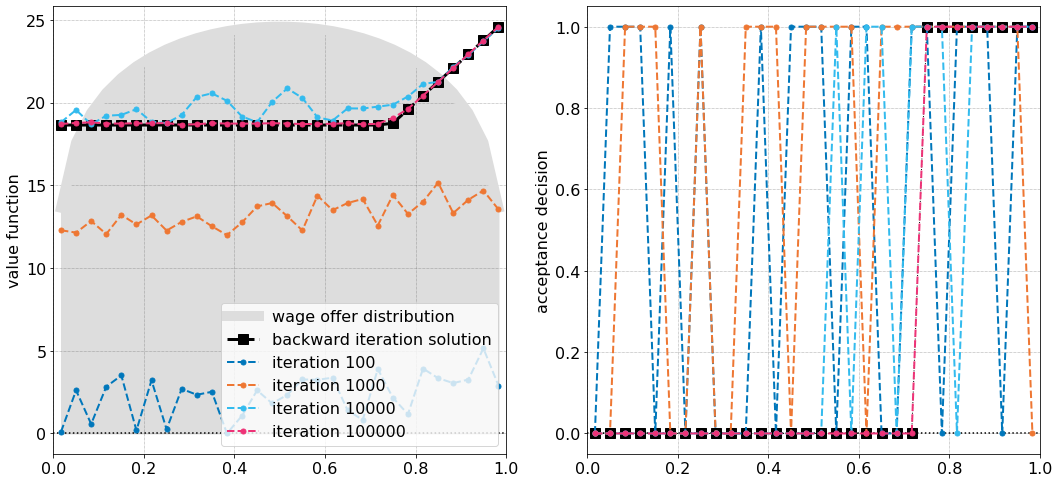

In [6]:
sol = solve_mccall_q_learning(model)
fig = plot_model(sol)
fig.savefig('graphs/q_learning_mccall_baseline.pdf',bbox_inches='tight')

### Role of the option to quit a job

In the above algorithm, we allowed the worker to quit a previously accepted
job in case when $Q^{n}\left( w,\text{reject}\right) >Q^{n}\left( w,\text{accept}\right) $. While quitting a previously accepted job is never optimal,
it can happen during the random iterations. This is more likely to happen if
the values $Q^{n}\left( w,\text{reject}\right) $ and $Q^{n}\left( w,\text{accept}\right) $ fluctuate near each other, which will be the case with the
leave option. Intuitively, incorrectly accepting a low wage offer this
period is not a big mistake if the worker can leave next period.

While the leave option speeds up convergence initially, it creates issues
with an accurate determination of the optimal decision in later iterations.\
The reason is that for low wage offers $w$, the values $Q^{n}\left( w,\text{reject}\right) $ and $Q^{n}\left( w,\text{accept}\right) $ will be close to
each other, so it is more likely to happen that they switch due to
randomness.

In the following example, we switch off the option to quit to document these
issues.

Iteration 100 stored at position 0.
Iteration 1000 stored at position 1.
Iteration 10000 stored at position 2.
Iteration 100000 stored at position 3.
Learning and experimentation rates at last iteration: α = 0.000045, ε = 0.000000.


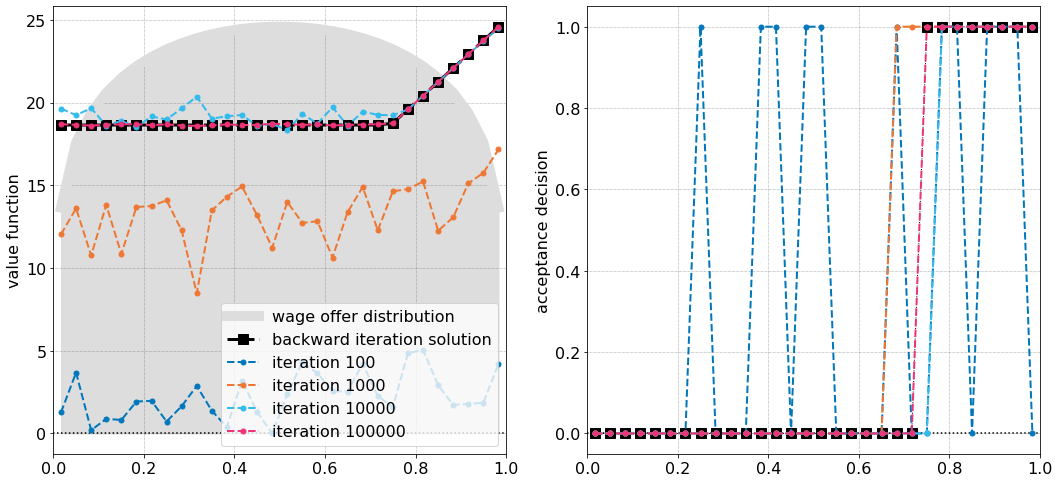

In [7]:
model_no_quit = model.copy()
model_no_quit["allow_quit"] = False

sol_no_quit = solve_mccall_q_learning(model_no_quit)
fig_no_quit = plot_model(sol_no_quit)
fig_no_quit.savefig('graphs/q_learning_mccall_no_quitting.pdf',bbox_inches='tight')

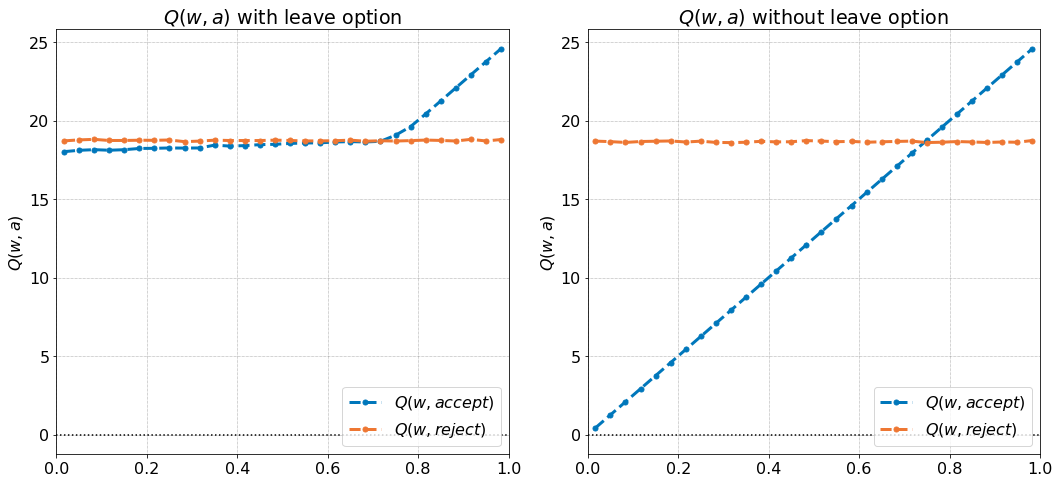

In [8]:
fig_param = {'figsize' : [15,7], 'fontsize': 16, 'subplots': [1,2],
         'title': '',
         'xlim': [0,1], 'ylim': [0,0],
         'xlabel': '', 'ylabel': '$Q(w,a)$',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': True,
         'showNBERrecessions' : False, 'showNBERrecessions_y': [-30,30]}
    
fig,ax = myGenerateTSPlot(fig_param)

ax[0,0].plot(sol["w_grid"],sol["Q_accept"][:,-1], label="$Q(w,accept)$",
        linewidth=3,linestyle="dashed",marker="o",markersize=5,color=clist_1[0])
ax[0,0].plot(sol["w_grid"],sol["Q_reject"][:,-1], label='$Q(w,reject)$',
        linewidth=3,linestyle="dashed",marker="o",markersize=5,color=clist_1[1])

ax[0,0].set_title('$Q(w,a)$ with leave option')
x = ax[0,0].legend(loc="lower right")

ax[0,1].plot(sol_no_quit["w_grid"],sol_no_quit["Q_accept"][:,-1], label="$Q(w,accept)$",
        linewidth=3,linestyle="dashed",marker="o",markersize=5,color=clist_1[0])
ax[0,1].plot(sol_no_quit["w_grid"],sol_no_quit["Q_reject"][:,-1], label='$Q(w,reject)$',
        linewidth=3,linestyle="dashed",marker="o",markersize=5,color=clist_1[1])

ax[0,1].set_title('$Q(w,a)$ without leave option')
x = ax[0,1].legend(loc="lower right")

fig.tight_layout()
fig.set_facecolor('#FFFFFF')
fig.savefig('graphs/q_learning_mccall_leave_option_effect.pdf',bbox_inches='tight')

### Learning in the parts of the state space with few offers

The speed of learning in the Q-learning algorithm critically depends on the ability to draw offers across the whole state space. If some offers are very unlikely to be drawn, learning in those parts of the state space will be slow, as the following example documents.

Iteration 100 stored at position 0.
Iteration 1000 stored at position 1.
Iteration 10000 stored at position 2.
Iteration 100000 stored at position 3.
Learning and experimentation rates at last iteration: α = 0.000045, ε = 0.000000.


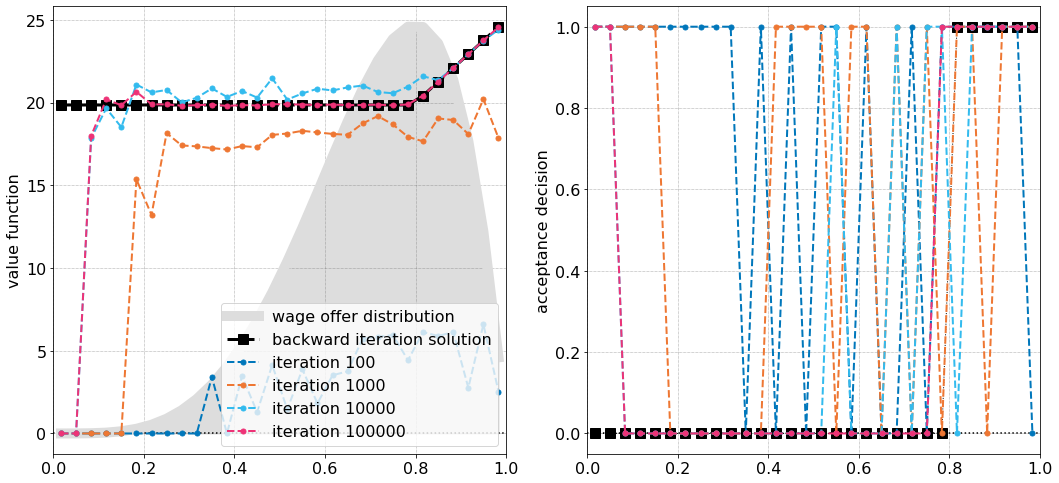

In [9]:
model_skewed = model.copy()
model_skewed["betaparam"] = [5,2]

sol_skewed = solve_mccall_q_learning(model_skewed)
fig_skewed = plot_model(sol_skewed)
fig_skewed.savefig('graphs/q_learning_mccall_skewed_offers.pdf',bbox_inches='tight')